### Visualize Hyper Params 

In [1]:
import pandas as pd
import plotly.express as px

- #### simeple version with pandas 

In [2]:
tune_res_f_p = '/data/chuang/Language_Model_Training_Data/Data/Raw_LM_Data/temp_topic_model/hp_tune_results.csv'
df = pd.read_csv(tune_res_f_p)

In [3]:
df.head()

,Unnamed: 0,n_neighbors,n_components,min_cluster_size,min_samples,metric,top_n_words,coherence,diversity,outlier,number_topics
0,0,5,3,20,20,euclidean,5,NaN,NaN,NaN,NaN
1,1,5,3,20,20,euclidean,10,NaN,NaN,NaN,NaN
2,2,5,3,20,20,euclidean,20,NaN,NaN,NaN,NaN
3,3,5,3,20,16,euclidean,5,0.489944,0.714454,0.35798,339.0
4,4,5,3,20,16,euclidean,10,0.428897,0.623599,0.35798,339.0


In [7]:
viz_df = df[['n_neighbors','n_components','min_cluster_size','min_samples','top_n_words','number_topics','coherence','outlier']]
viz_df.fillna(0,inplace=True)

/tmp/ipykernel_324995/2304927155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_df.fillna(0,inplace=True)


<AxesSubplot: >

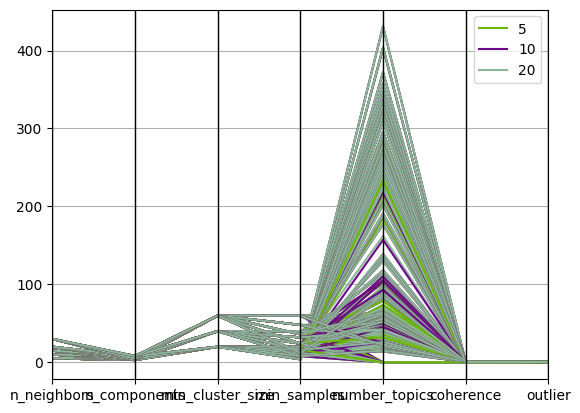

In [13]:
pd.plotting.parallel_coordinates(viz_df,'top_n_words',sort_labels=True)

In [23]:
dims = ["n_components","min_cluster_size","min_samples","number_topics","top_n_words","coherence"]
df_filter = df['coherence']>0.65
chart_df = viz_df[df_filter]
# Create the chart:
fig = px.parallel_coordinates(
    chart_df, 
    color="coherence", 
    dimensions=dims,
    #labels={"species_id": "Species","sepal_width": "Sepal Width", "sepal_length": "Sepal Length", "petal_width": "Petal Width", "petal_length": "Petal Length", },
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=2)

# Hide the color scale that is useless in this case
fig.update_layout(coloraxis_showscale=False)

# Show the plot
fig.show()

/home/chuang/.conda/envs/sbert/lib/python3.8/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [15]:
fig.write_html("/data/chuang/Language_Model_Training_Data/Data/Raw_LM_Data/temp_topic_model/parallel-coordinate-plot-plotly.html")